# Introduction to Data Augmentation

## What is Data Augmentation?

Data augmentation is a technique used to artificially expand the size and variability of a dataset by applying transformations to existing data samples. This is especially common in computer vision tasks, where collecting large amounts of labeled data can be costly and time-consuming.

In practice, data augmentation involves modifying existing samples in ways that preserve their labels. For example, an image of a cat remains a cat even if it's flipped horizontally or slightly rotated. These modified samples are then used during training to improve the model's ability to generalize.

Common augmentation techniques for images include:

* Flipping (horizontal or vertical)
* Rotation
* Scaling and cropping
* Changing brightness, contrast, or saturation
* Adding noise or blur

While data augmentation is most often associated with image data, it can also be applied to other types of data such as text (e.g., synonym replacement, word shuffling) and audio (e.g., time shifting, pitch scaling).


## When Should You Perform Data Augmentation?

Data augmentation is particularly useful in the following scenarios:

* When the dataset is small or unbalanced across classes.
* When overfitting is observed—i.e., the model performs well on training data but poorly on validation/test data.
* When you want the model to be robust to variations that are common in the real world, such as different lighting conditions, orientations, or background noise.

In deep learning workflows, augmentation is typically applied **on-the-fly during training** rather than storing the augmented images beforehand. This ensures variability across epochs and reduces storage requirements.


## What Are the Benefits of Using Data Augmentation?

Using data augmentation offers several practical and theoretical benefits:

* **Improves generalization**: By exposing the model to a wider range of examples, it learns features that generalize better to unseen data.
* **Reduces overfitting**: Models trained on augmented data are less likely to memorize specific training examples.
* **Increases dataset size**: Especially important when data collection is limited or expensive.
* **Improves robustness**: Augmented models are better at handling input distortions, such as noise or minor misalignments.

These benefits often lead to better performance on validation and test sets, and sometimes even outperform models trained on larger but unaugmented datasets.

## Data Augmentation in Practice

### Read image from file

We first read an image file and decode it into a TensorFlow `tensor` with 3 color channels (RGB). The tensor can then be used for processing or displaying the image.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

image_path = 'data/brain.png'
image = tf.io.decode_jpeg(tf.io.read_file(image_path), channels=3)

### Plot Images Side by Side

We then use Matplotlib to display two images side by side for easy comparison. It accepts the original and transformed images along with optional titles. The axes are hidden, and the layout is adjusted to prevent overlap.

In [27]:
import matplotlib.pyplot as plt

def show_side_by_side(original, transformed, title1="Original", title2="Transformed"):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.axis('off')
    plt.title(title1)
    
    plt.subplot(1, 2, 2)
    plt.imshow(transformed)
    plt.axis('off')
    plt.title(title2)
    
    plt.tight_layout()
    plt.savefig('new_brain.png', dpi=300)
    plt.show()


### Horizontal Flip

- `tf.image.flip_left_right(image)` creates a **mirror image** by flipping the input image **horizontally** (left ↔ right).

#### When to Use:

* Useful for augmenting datasets where left-right orientation **does not affect** the label (e.g., animals, objects).
* Helps models generalize better by introducing symmetry.

#### Keep in Mind:

* **Do not use** for tasks where direction matters (e.g., reading text, traffic signs).
* Does **not change image shape**, only pixel arrangement.

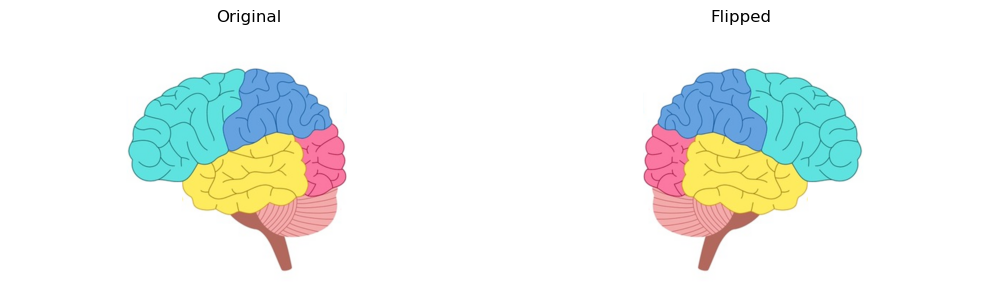

In [29]:
# Apply horizontal flip
flipped_image = tf.image.flip_left_right(image)

show_side_by_side(image, flipped_image, "Original", "Flipped")


### Center Crop and Resize

`tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)` extracts a rectangular region from the image.

* Commonly used to focus on important parts or simulate zooming in.
* Cropping reduces image size; resizing can restore original dimensions.
* Keep aspect ratio in mind to avoid distortion.
* Useful to increase dataset variability by changing image framing.


In [9]:
# Define crop size (height, width, channels)
crop_size = (100, 500, 3)

# Crop the image directly
cropped = tf.image.c(image, size=crop_size)

show_side_by_side(image, cropped, "Original", "Cropped")


AttributeError: module 'tensorflow._api.v2.image' has no attribute 'c'

### Rotate

`tf.image.rot90(image, k=1)` rotates the image by 90 degrees counterclockwise `k` times.

* Useful to simulate different orientations and increase data diversity.
* Rotations are multiples of 90°, preserving image shape and avoiding interpolation artifacts.
* Not suitable if orientation is critical (e.g., digits, text).
* Supports values of `k` from 1 to 3 for 90°, 180°, and 270° rotations respectively.


In [ ]:
# Rotate the image 90 degrees counterclockwise (k=1)
rotated = tf.image.rot90(image, k=1)

show_side_by_side(image, rotated, "Original", "Rotated")


### Contrast Adjustment

`tf.image.adjust_contrast(image, contrast_factor)` modifies the contrast of the image by scaling the difference between each pixel and the mean pixel value.

* Increasing `contrast_factor` (>1) makes bright areas brighter and dark areas darker, enhancing differences.
* Decreasing `contrast_factor` (<1) reduces contrast, making the image appear more washed out.
* Useful to simulate varying lighting conditions and improve model robustness.
* Input image can be `uint8` or `float32`; output type matches input.


In [ ]:
# Adjust contrast (factor >1 increases contrast, <1 decreases)
contrast_factor = 6.5
contrast_adjusted = tf.image.adjust_contrast(image, contrast_factor)

show_side_by_side(image, contrast_adjusted, "Original", "Contrast")



### Brightness Adjustment

`tf.image.adjust_brightness(image, delta)` adds a delta value to all pixels, making the image brighter or darker.

* Positive `delta` increases brightness; negative `delta` decreases it.
* Useful to simulate different lighting conditions in training data.
* Works on both `uint8` and `float32` images; output type matches input.
* Be cautious with large delta values to avoid clipping pixel intensities.


In [ ]:
# Adjust brightness (positive delta brightens, negative delta darkens)
delta = -0.5  # try values between -1.0 and 1.0
brightened = tf.image.adjust_brightness(image, delta)

show_side_by_side(image, brightened, "Original", "Brightened")


### Hue Adjustment

`tf.image.adjust_hue(image, delta)` shifts the hue of an image by adding `delta` to the hue channel in HSV color space.

* `delta` is a float in the range `[-0.5, 0.5]`, representing the fraction of the hue rotation.
* Changing hue alters the overall color tone without affecting brightness or saturation.
* Useful for simulating different lighting and color variations in images.
* Input image should be in `float32` format with pixel values in `[0, 1]`.


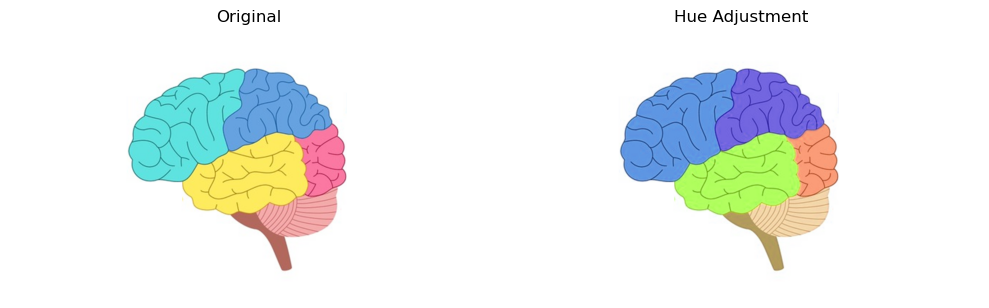

In [16]:
# Adjust hue (delta between -0.5 and 0.5)
delta = 0.1
hue_adjusted = tf.image.adjust_hue(image, delta)



show_side_by_side(image, hue_adjusted, "Original", "Hue Adjustment")



### All in One

We now visualize the original image alongside several augmented versions in a grid layout. Each transformation simulates a common data augmentation technique used to improve model generalization:

* **Original**: The unmodified input image.
* **Flipped**: Horizontally flipped using `tf.image.flip_left_right`.
* **Cropped**: Random section extracted with `tf.image.random_crop`.
* **Rotated**: Rotated 90° counterclockwise using `tf.image.rot90`.
* **Contrast**: Contrast increased with `tf.image.adjust_contrast`.
* **Brightness**: Brightness adjusted via `tf.image.adjust_brightness`.
* **Hue**: Hue shifted using `tf.image.adjumparison.


In [ ]:
# Titles and images
titles = [
    "Original",
    "Flipped",
    "Cropped",
    "Rotated",
    "Contrast x1.5",
    "Brightness +0.2",
    "Hue +0.1"
]

images = [
    image,
    flipped_image,
    cropped,
    rotated,
    contrast_adjusted,
    brightened,
    hue_adjusted
]

# Plot in a grid
plt.figure(figsize=(15, 6))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

plt.tight_layout()
plt.show()

## Strategies for Data Augmentation in TensorFlow

In TensorFlow, data augmentation can be done in two main ways: **offline** and **online**. Both methods help improve model performance by creating more training data through transformations like flipping, cropping, or changing brightness.
#### Offline Augmentation

Offline augmentation means applying changes to the images before training starts. The new images are saved to disk and used just like the original ones.

This method is simple and saves time during training. Howev**er, the changes are fixed, so the model always sees the same augmente**d images.

* You transform and save images once, before training.
* It reduces training time but needs more storage.
* Good for small datasets or when training on limited hrdware.

#### Online Augmentation

Online augmentation applies transformations while the mod**el is training. Each time the model sees an image, it may be slightly different due t**o random changes.

TensorFlow supports this using:

* `tf.image` functions in a data pipeline.
* Preprocessing layers like `tf.keras.layers.RandomFlip()`.

This method gives the model more variety and helps it generalize better. Since the augmented images are created on the fly, you don’t need extra space on disk.

* Augmented images are created in real time.
* More flexible and improves model robustness.
* Preferred for large datasets and dynamic training.

In short, **offline** is fast and simple, while **online** gives better variety and performance. Many projects combine both: generate some images offline, then add more changes during training.


### Online Data Augmentation with TensorFlow on CIFAR-10

This code shows how to use TensorFlow to change images during training without saving new files. Instead of making extra images before training, it changes each image randomly when the model sees it. This way, th**e model gets to learn from many different versions of the same imag**es, helping it work better on new, unseen data.

The code appl**ies three kinds of changes to the im**ages: flipping them left to right, rotating them a little, and zooming in or out slightly. These changes happen randomly and make the training data more varied and realistic.

Key points about the augmentation:

* Each image has a 50% chance to be flipped horizontally
* Images are rotated by a small random amount (up to about 36 degrees)
* Zoom in or out by a small random amount (up to 10%)
* Changes happen during training, so the model sees different versions each time
* This improves the model’s ability to generalize without needing more stored images


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), _ = tf.keras.datasets.cifar10.load_data()

# Normalize the images to [0, 1]
train_images = train_images.astype("float32") / 255.0

# Define a simple augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# Apply augmentation to a batch of images
augmented_images = data_augmentation(train_images[:9])

# Plot original and augmented images
plt.figure(figsize=(10, 4))

for i in range(9):
    plt.subplot(2, 9, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
    if i == 4:
        plt.title("Original")

    plt.subplot(2, 9, i + 10)
    plt.imshow(augmented_images[i])
    plt.axis('off')
    if i == 4:
        plt.title("Augmented")

plt.tight_layout()
plt.show()


### Adding Data Augmentation Inside a CNN Model

This approach adds data augmentation directly inside a neural network using TensorFlow and Keras. Instead of modifying images before training, the model changes images automatically during training. It applies random flips, rotations, and zooms, helping the model learn better and generalize to new images.

The model starts with an `Input` layer that defines the size of the images. This step is important so the augmentation layer knows how to handle the images correctly. After that, the CNN layers process the augmented images to learn features and classify them.

By integrating augmentation this way, the model does not need extra copies of images. It sees different versions of each image every training epoch, which improves its robustness and accuracy.

Key points:

* Use an `Input` layer to define the shape of input images.
* Place data augmentation as the next layer to transform images on the fly.
* The model trains on both original and augmented images automatically.
* This saves storage and preprocessing time compared to offline augmentation.
* Helps the model become more flexible to changes in image data.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")

# Build CNN model with Input layer first
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),   # <-- Explicit input shape here
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Summary of Data Augmentation

Data augmentation is a technique that increases the variety of training images by applying random changes like flipping, rotating, cropping, or adjusting colors. This helps machine learning models learn better and avoid overfitting by seeing many different versions of the same images.

It can be done before training (offline) or during training (online). Online augmentation applies changes on the fly, saving storage and making training more flexible.

Key benefits include:

* Improving model accuracy and generalization.
* Reducing the chance of overfitting.
* Making models robust to real-world variations.
* Saving storage space when done online.

Data augmentation is an easy and effective way to help models perform well on new, unseen data.
